### Step 1: Import Required Libraries

In [38]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Step 2: Load the Dataset

In [2]:
# Load the Titanic dataset from the local CSV file
titanic = pd.read_csv('C:/Users/vaibh/Desktop/AWP/AWP Project/titanic/train.csv')

In [5]:
# Check the first few rows to inspect the data
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [8]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


In [9]:
# Find shape of our dataset (number of rows and number of columns)
titanic.shape

(891, 11)

In [10]:
# Check for missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [11]:
# Check data types
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [12]:
# Strip any leading or trailing spaces from column names
titanic.columns = titanic.columns.str.strip()
print("Step 1: Columns after stripping spaces:")
print(titanic.columns)

Step 1: Columns after stripping spaces:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [13]:
# Check for missing values in the dataset
print("\nStep 2: Missing values in each column (before cleaning):")
print(titanic.isnull().sum())


Step 2: Missing values in each column (before cleaning):
PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64


In [14]:
# Handle missing 'Age' values by filling with the median age
print("\nStep 3: Handling missing 'Age' values...")
print(f"Missing 'Age' values before: {titanic['Age'].isnull().sum()}")
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())  # Fill missing age values with median
print(f"Missing 'Age' values after: {titanic['Age'].isnull().sum()}")


Step 3: Handling missing 'Age' values...
Missing 'Age' values before: 177
Missing 'Age' values after: 0


In [15]:
# Handle missing 'Embarked' values by dropping rows with missing 'Embarked'
print("\nStep 4: Handling missing 'Embarked' values...")
print(f"Missing 'Embarked' values before: {titanic['Embarked'].isnull().sum()}")
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])  # Fill missing Embarked values with mode
print(f"Missing 'Embarked' values after: {titanic['Embarked'].isnull().sum()}")


Step 4: Handling missing 'Embarked' values...
Missing 'Embarked' values before: 2
Missing 'Embarked' values after: 0


In [16]:
# Handle missing 'Fare' values (if any) by filling with the median fare
print("\nStep 5: Handling missing 'Fare' values...")
print(f"Missing 'Fare' values before: {titanic['Fare'].isnull().sum()}")
if titanic['Fare'].isnull().sum() > 0:
    titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].median())  # Fill missing fare values with median
print(f"Missing 'Fare' values after: {titanic['Fare'].isnull().sum()}")


Step 5: Handling missing 'Fare' values...
Missing 'Fare' values before: 0
Missing 'Fare' values after: 0


In [17]:
# Handle categorical features
print("\nStep 6: Converting 'Gender' and 'Embarked' columns to categorical types...")
titanic['Gender'] = titanic['Gender'].astype('category')
titanic['Embarked'] = titanic['Embarked'].astype('category')


Step 6: Converting 'Gender' and 'Embarked' columns to categorical types...


In [18]:
# Verify that there are no more missing values
print("\nStep 7: Missing values after cleaning:")
print(titanic.isnull().sum())


Step 7: Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\vaibh\AppData\Local\Temp\ipykernel_13028\904188758.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=titanic, palette='Set2')


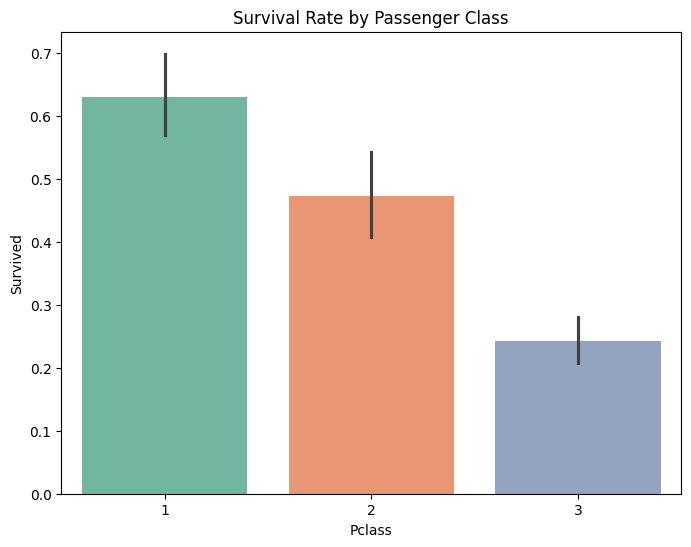

In [19]:
# 1. Bar Chart (Survival by Class)
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=titanic, palette='Set2')
plt.title('Survival Rate by Passenger Class')
plt.show()

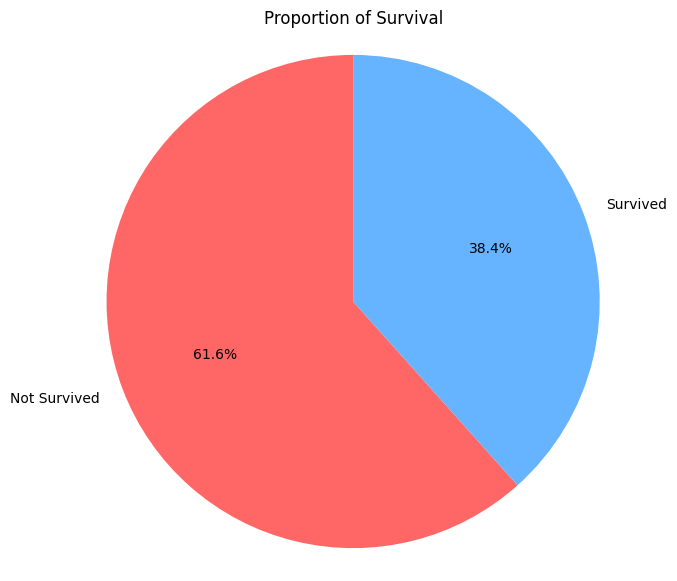

In [20]:
# 2. Pie Chart (Survival Proportion)
survival_data = titanic['Survived'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(survival_data, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90, colors=['#ff6666', '#66b3ff'])
plt.title('Proportion of Survival')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

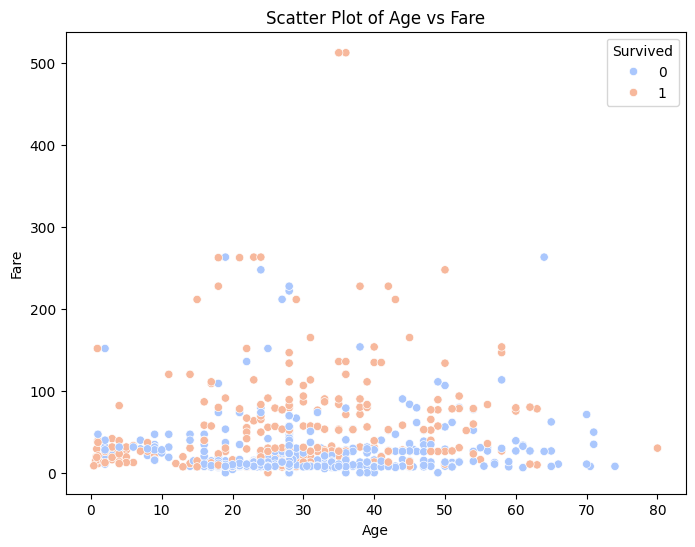

In [21]:
# 3. Scatter Plot (Age vs. Fare)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic, palette='coolwarm')
plt.title('Scatter Plot of Age vs Fare')
plt.show()

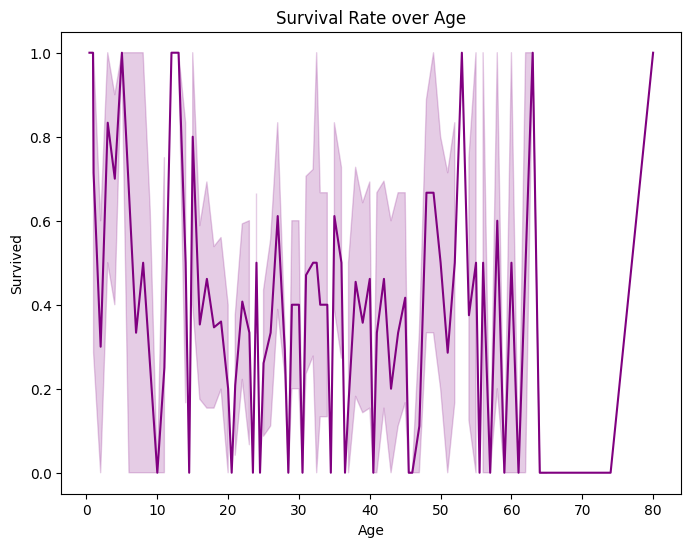

In [22]:
# 4. Line Plot (Survival over Time by Age)
plt.figure(figsize=(8, 6))
sns.lineplot(x='Age', y='Survived', data=titanic, color='purple')
plt.title('Survival Rate over Age')
plt.show()

C:\Users\vaibh\AppData\Local\Temp\ipykernel_13028\4234361903.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=titanic, palette='muted')


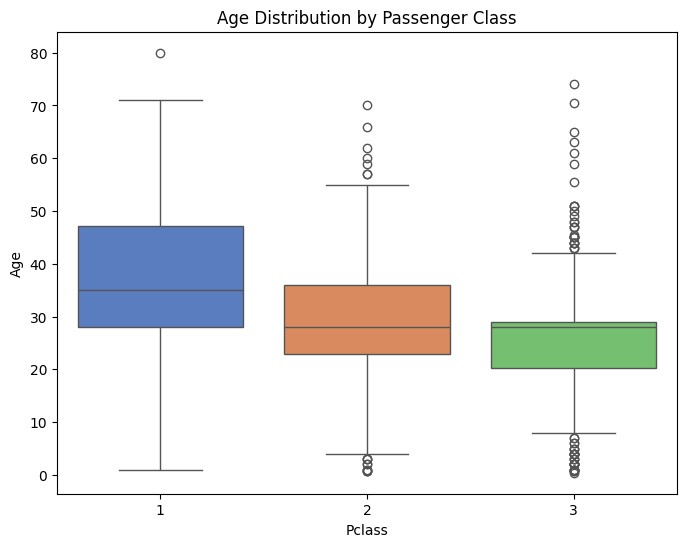

In [23]:
# 5. Box Plot (Age Distribution by Passenger Class)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', data=titanic, palette='muted')
plt.title('Age Distribution by Passenger Class')
plt.show()

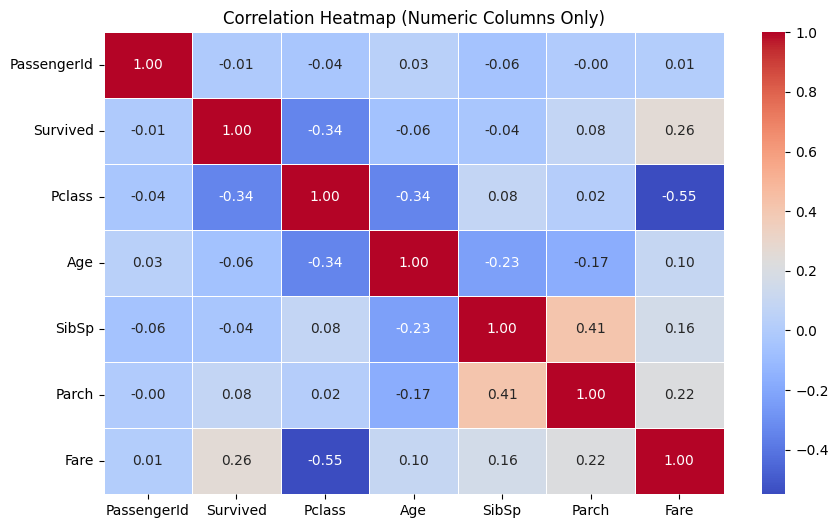

In [24]:
# 6. Correlation Heatmap (Only Numeric Columns)
corr_matrix = titanic.select_dtypes(include=['number']).corr()  # Select only numeric columns
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap (Numeric Columns Only)')
plt.show()

<Figure size 800x600 with 0 Axes>

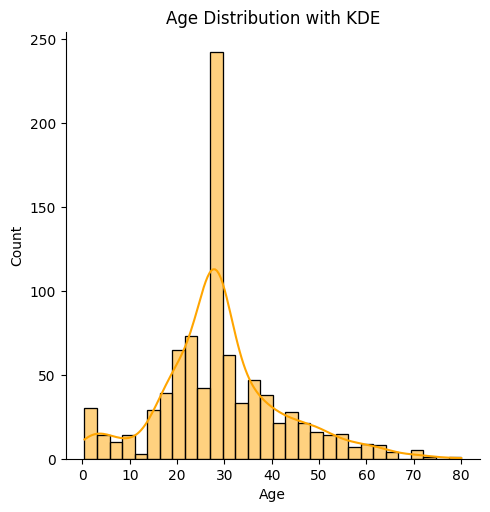

In [25]:
# 7. Displot with KDE (Distribution of Age with Kernel Density Estimate)
plt.figure(figsize=(8, 6))
sns.displot(titanic['Age'], kde=True, color='orange', bins=30)
plt.title('Age Distribution with KDE')
plt.show()

C:\Users\vaibh\AppData\Local\Temp\ipykernel_13028\1069152206.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Survived', y='Age', data=titanic, palette='coolwarm')
C:\Users\vaibh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vaibh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vaibh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 9.6% of the points cannot be placed; you may want to d

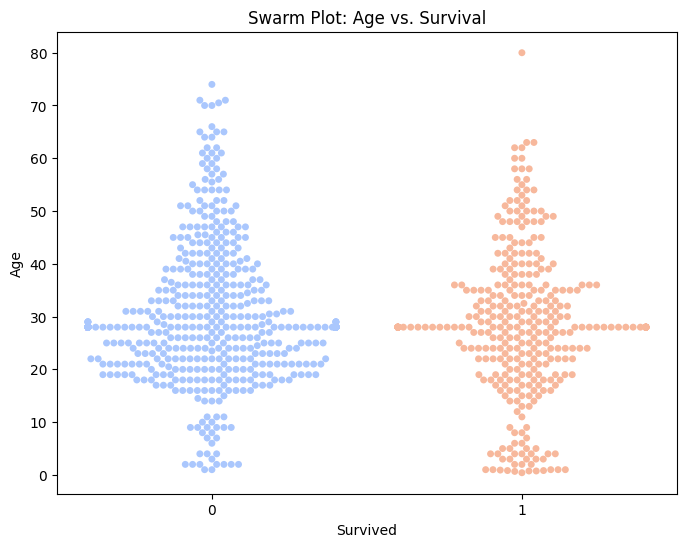

In [26]:
# 8. Swarm Plot (Age vs. Survival)
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Survived', y='Age', data=titanic, palette='coolwarm')
plt.title('Swarm Plot: Age vs. Survival')
plt.show()

C:\Users\vaibh\AppData\Local\Temp\ipykernel_13028\3223643229.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(titanic['Age'], shade=True, color='green', alpha=0.6)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_13028\3223643229.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(titanic['Fare'], shade=True, color='blue', alpha=0.6)


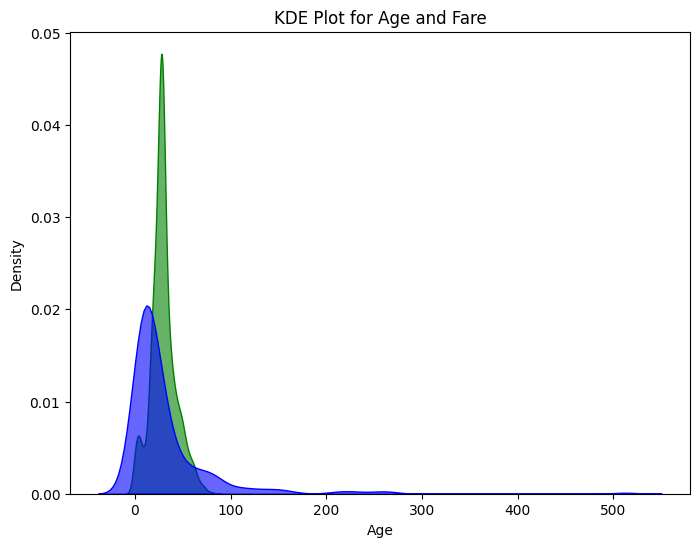

In [27]:
# 9. KDE Plot (Kernel Density Estimate for Age)
plt.figure(figsize=(8, 6))
sns.kdeplot(titanic['Age'], shade=True, color='green', alpha=0.6)
sns.kdeplot(titanic['Fare'], shade=True, color='blue', alpha=0.6)
plt.title('KDE Plot for Age and Fare')
plt.show()

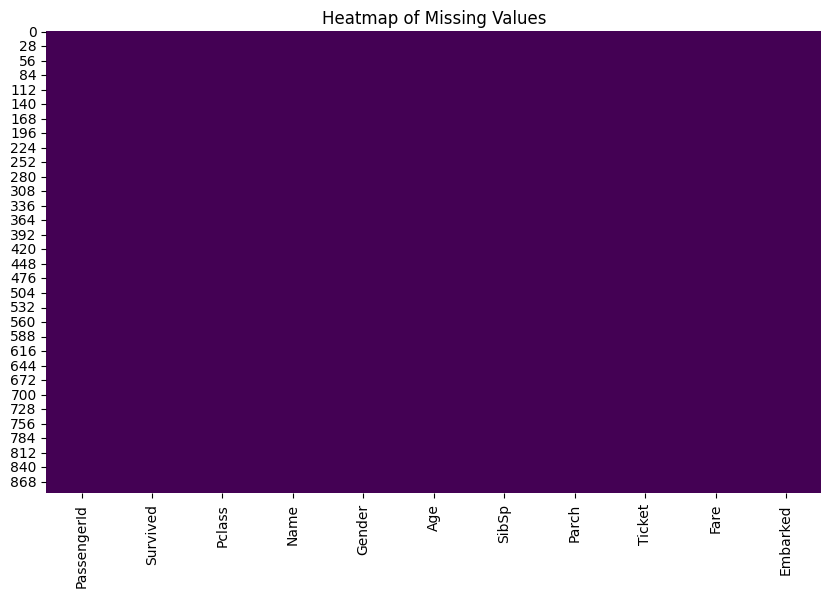

In [28]:
# 10. Heatmap of Missing Values
plt.figure(figsize=(10, 6))
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

<Figure size 800x600 with 0 Axes>

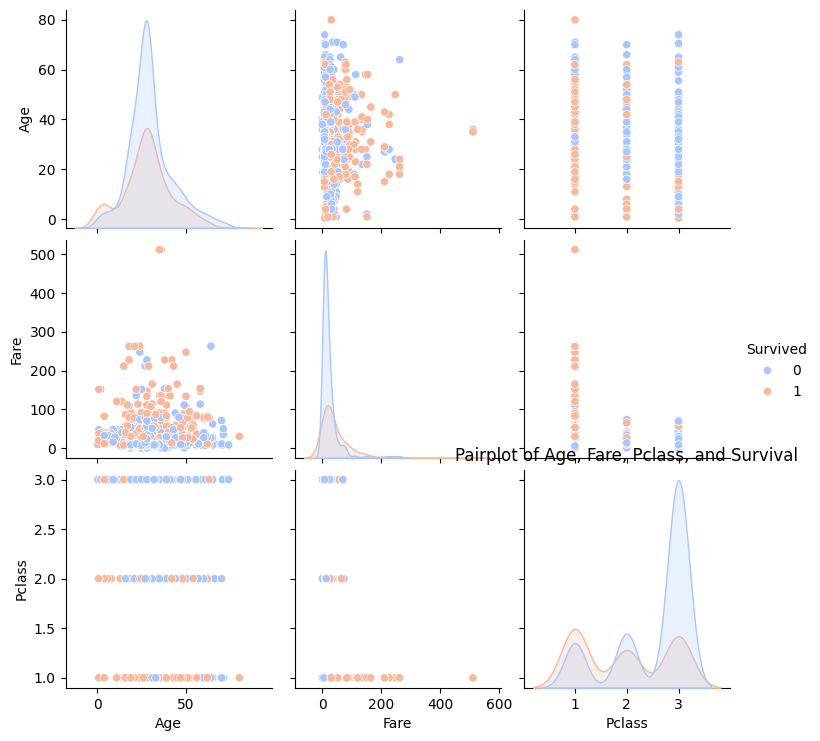

In [29]:
# 11. Pairplot (Pairwise Relationships)
plt.figure(figsize=(8, 6))
sns.pairplot(titanic[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived', palette='coolwarm')
plt.title('Pairplot of Age, Fare, Pclass, and Survival')
plt.show()

C:\Users\vaibh\AppData\Local\Temp\ipykernel_13028\1704590920.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=titanic, palette='Set2')


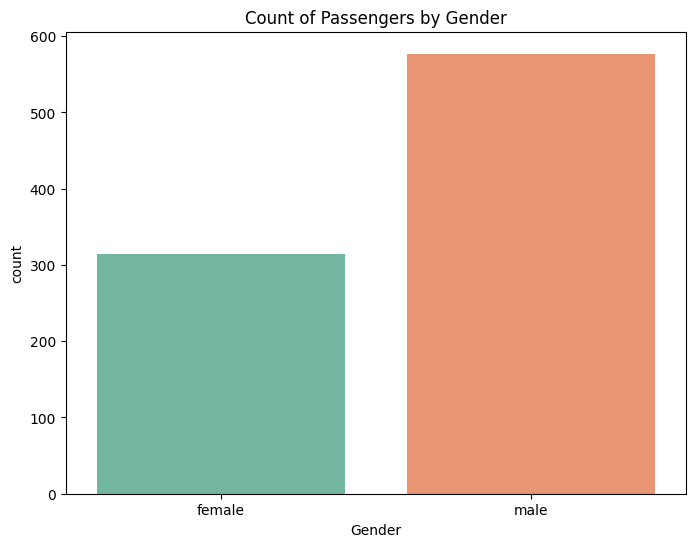

In [30]:
# 12. Count Plot (Categorical Feature Counts)
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=titanic, palette='Set2')
plt.title('Count of Passengers by Gender')
plt.show()

C:\Users\vaibh\AppData\Local\Temp\ipykernel_13028\3703931356.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Pclass', y='Age', data=titanic, palette='muted')


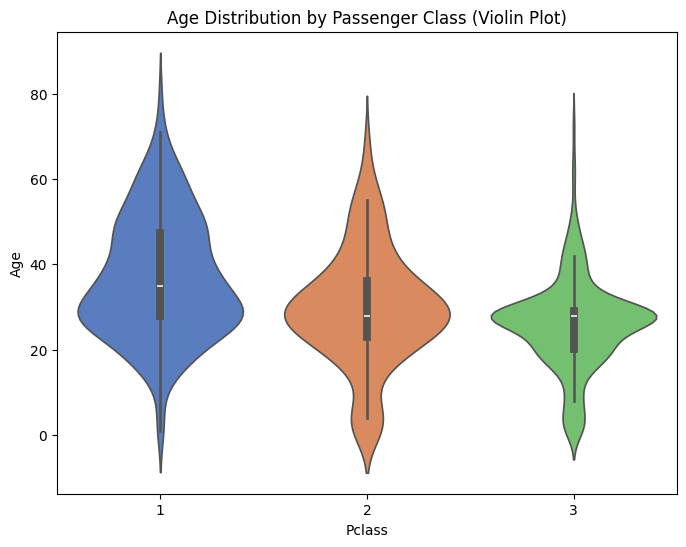

In [31]:
# 13. Violin Plot (Distribution and Frequency)
plt.figure(figsize=(8, 6))
sns.violinplot(x='Pclass', y='Age', data=titanic, palette='muted')
plt.title('Age Distribution by Passenger Class (Violin Plot)')
plt.show()

C:\Users\vaibh\AppData\Local\Temp\ipykernel_13028\1449800573.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Embarked', data=titanic, palette='pastel')


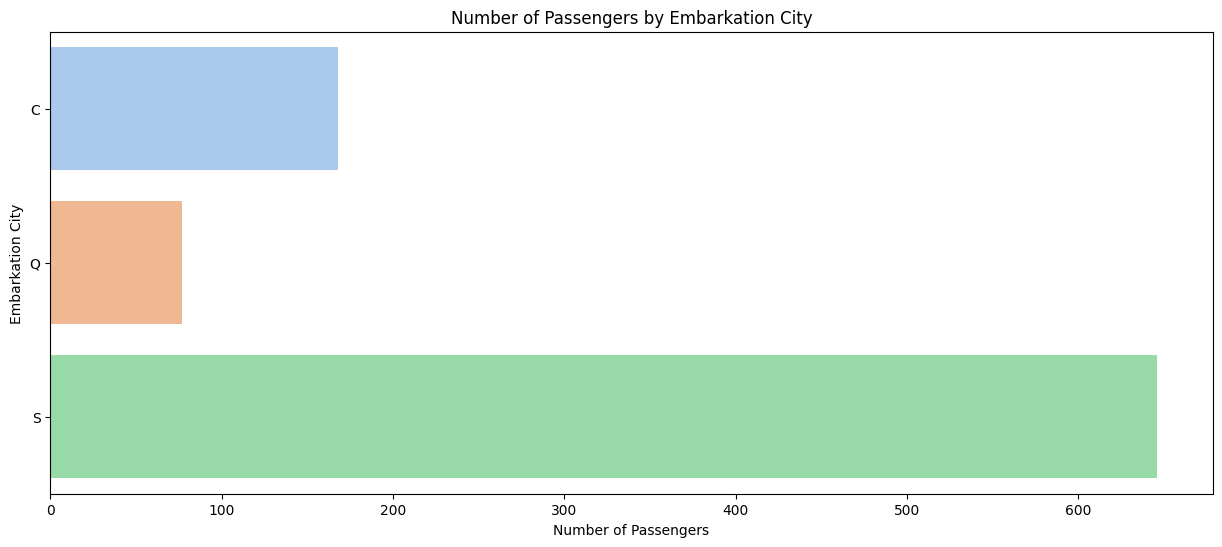

In [33]:
# Assuming 'data' is your DataFrame and "Embarked" contains city names
plt.figure(figsize=(15, 6))

# Create horizontal bar chart for the 'Embarked' column
sns.countplot(y='Embarked', data=titanic, palette='pastel')

# Add labels and title
plt.title('Number of Passengers by Embarkation City')
plt.xlabel('Number of Passengers')
plt.ylabel('Embarkation City')

# Show the plot
plt.show()

C:\Users\vaibh\AppData\Local\Temp\ipykernel_13028\4013313953.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = titanic.groupby(age_group)['Survived'].value_counts().unstack().fillna(0)


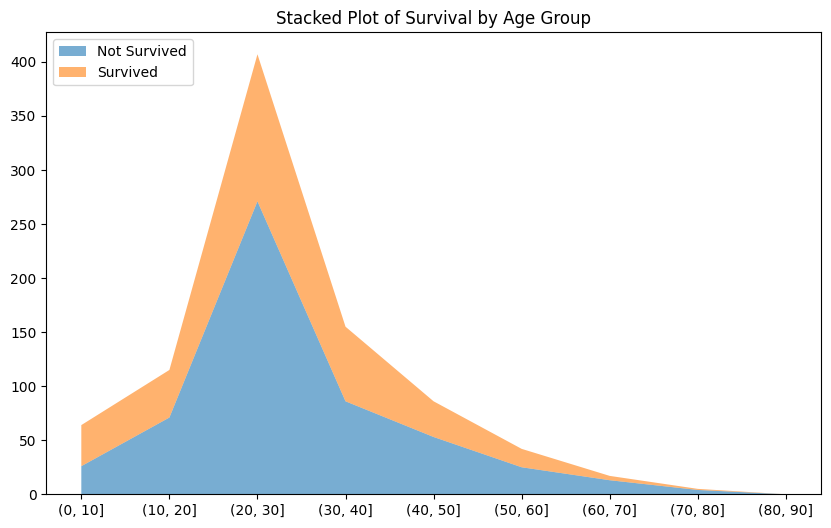

In [34]:
# 16. Stackplot (Stacked Line Plot)
age_group = pd.cut(titanic['Age'], bins=np.arange(0, 100, 10))
age_survival = titanic.groupby(age_group)['Survived'].value_counts().unstack().fillna(0)

plt.figure(figsize=(10, 6))
plt.stackplot(age_survival.index.astype(str), age_survival[0], age_survival[1], labels=['Not Survived', 'Survived'], alpha=0.6)
plt.title('Stacked Plot of Survival by Age Group')
plt.legend(loc='upper left')
plt.show()

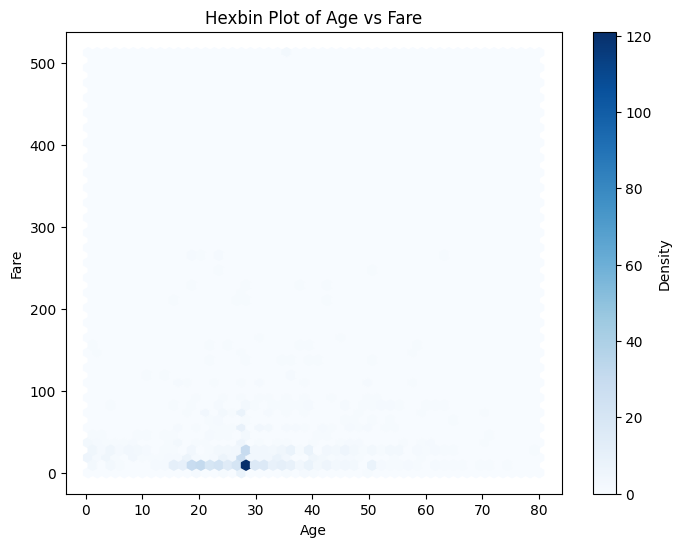

In [35]:
# 17. Hexbin Plot (Binned Scatter Plot)
plt.figure(figsize=(8, 6))
plt.hexbin(titanic['Age'], titanic['Fare'], gridsize=50, cmap='Blues')
plt.colorbar(label='Density')
plt.title('Hexbin Plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

C:\Users\vaibh\AppData\Local\Temp\ipykernel_13028\1628900753.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Pclass', y='Age', data=titanic, jitter=True, palette='Set2')


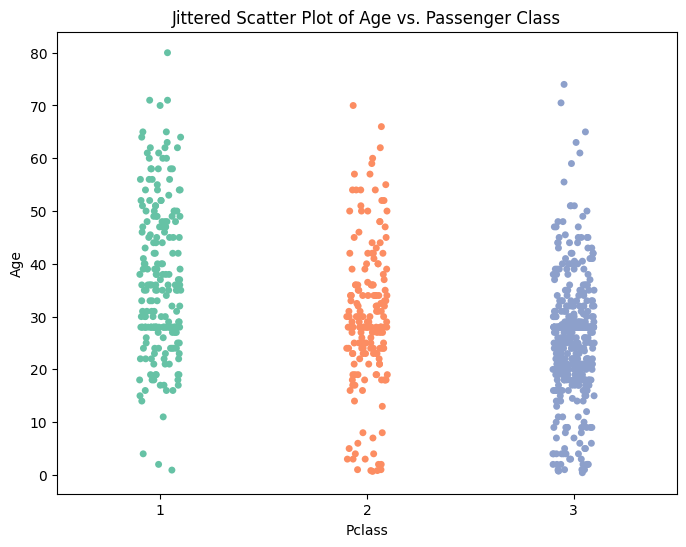

In [36]:
# 18. Categorical Scatter Plot (Jittered)
plt.figure(figsize=(8, 6))
sns.stripplot(x='Pclass', y='Age', data=titanic, jitter=True, palette='Set2')
plt.title('Jittered Scatter Plot of Age vs. Passenger Class')
plt.show()

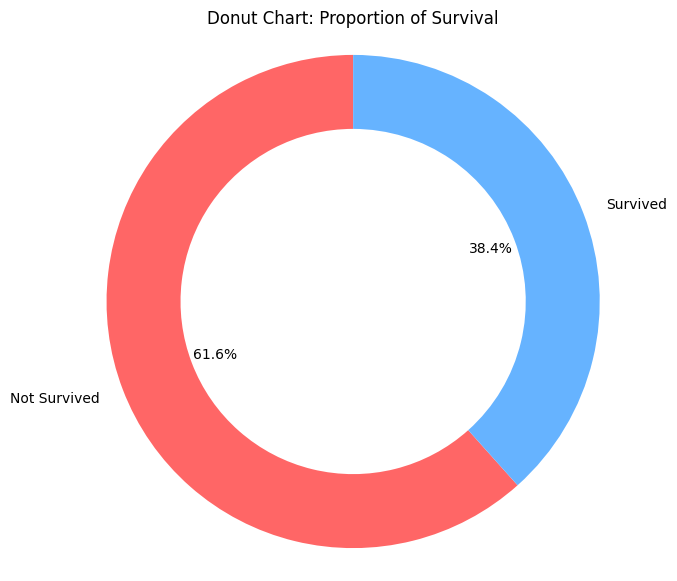

In [37]:
# 19. Donut Chart (Variation of Pie Chart)
plt.figure(figsize=(7, 7))
donut_data = titanic['Survived'].value_counts()
plt.pie(donut_data, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90, colors=['#ff6666', '#66b3ff'], wedgeprops={'width': 0.3})
plt.title('Donut Chart: Proportion of Survival')
plt.axis('equal')
plt.show()